# Indtroduction 

L'objectif du présent mandant est d'établir un modèle capable de détection les fraudes en assurance automobile. Les réclamations frauduleuses en assurance automobile représentent un enjeu important pour les assurances car en étant capable de les détecter elles pourraient éviter de débourser de gros montants pour du faux et avoir plus de ressources pour l'indemnisations des vraies réclamations.

In [45]:
# Valeurs manquantes 
import missingno as msno 

# Visualisation 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Traitement des données
import pandas as pd
import numpy as np

# Encodage 
from sklearn.preprocessing import LabelEncoder

# Gestion des Outliers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
df = pd.read_csv("data/fraud_oracle.csv")
df.shape

(15420, 33)

In [21]:
pd.set_option("display.max_columns", None)

## Définition des variables 
- **Month** : Le mois dans lequel la réclamation d'assurance a été faite
- **WeekOfMonth** : La semaine du mois dans laquelle la réclamation a été faite
- **DayOfWeek** : Le jour de la semaine pour lequel la réclamation a été faite
- **Make** : La marque du véhicule assuré
- **AccidentArea** : L'aire dans laquelle l'accident a eu lieu
- **DayOfWeekClaimed** : Le jour de la semaine pour lequel la réclamation a été traitée
- **MonthClaimed** : Le mois pour lequel la réclamation a été traitée
- **WeekOfMonthClaimed** : La semaine du mois pour laquelle la réclamation a été traitée
- **Sex** : Le sexe de l'assuré
- **MaritalStatus** : Le statut matrimonial de l'assuré
- **Age** : l'age de l'assuré
- **Fault** : indique si l'assuré est le responsable de l'accident
- **PolicyType** : Le type d'asssurance souscrit
- **VehicleCategory** : La catégorie du véhicule (ex: SUV, sport...)
- **VehiclePrice** : Le prix du véhicule
- **FraudFound_P** : indique s'il y a eu une fraude pour la réclamation en question
- **PolicyNumber** : Identifiant unique pour chaque police
- **RepNumber** : Identifiant unique pour les réclamations
- **Deductible** : Le montant de la franchise à la charge de l'assuré avant que l'assureur ne paie pour une réclamation
- **DriverRating** : Niveau de conduite de l'assuré
- **Days_Policy_Claim** : Le nombre de jours de couverture de la police avant la réclamation
- **PastNumberOfClaims** : Le nombre de réclamations passées
- **AgeOfVehicle** : L'age du véhicule impliqué dans l'accident
- **AgeOfPolicyHolder** : L'age du titulaire de police
- **PoliceReportedFiled** : Indique s'il y a un rapport de police ou non
- **WitnessPresent** : Indique s'il y a des témoins ou non
- **AgentType** : Le type d'agent d'assurance qui a pris en charge la réclamation
- **NumberOfSuppliments** : Le nombre de documents supplémentaires ou réclamations reliée à la même réclamation
- **AdressChange_Claim** : Indique si l'adresse du titulaire de police a changé au moment de la réclamation
- **NumberOfCars** : Le nombre de véhicules assurés par la police
- **Year** : L'année dans laquelle la réclamation a été traitée
- **BasePolicy** : Les types de couvertures (ex: Responsabilité, colision, ....)

In [22]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Valeurs manquantes 

<Axes: >

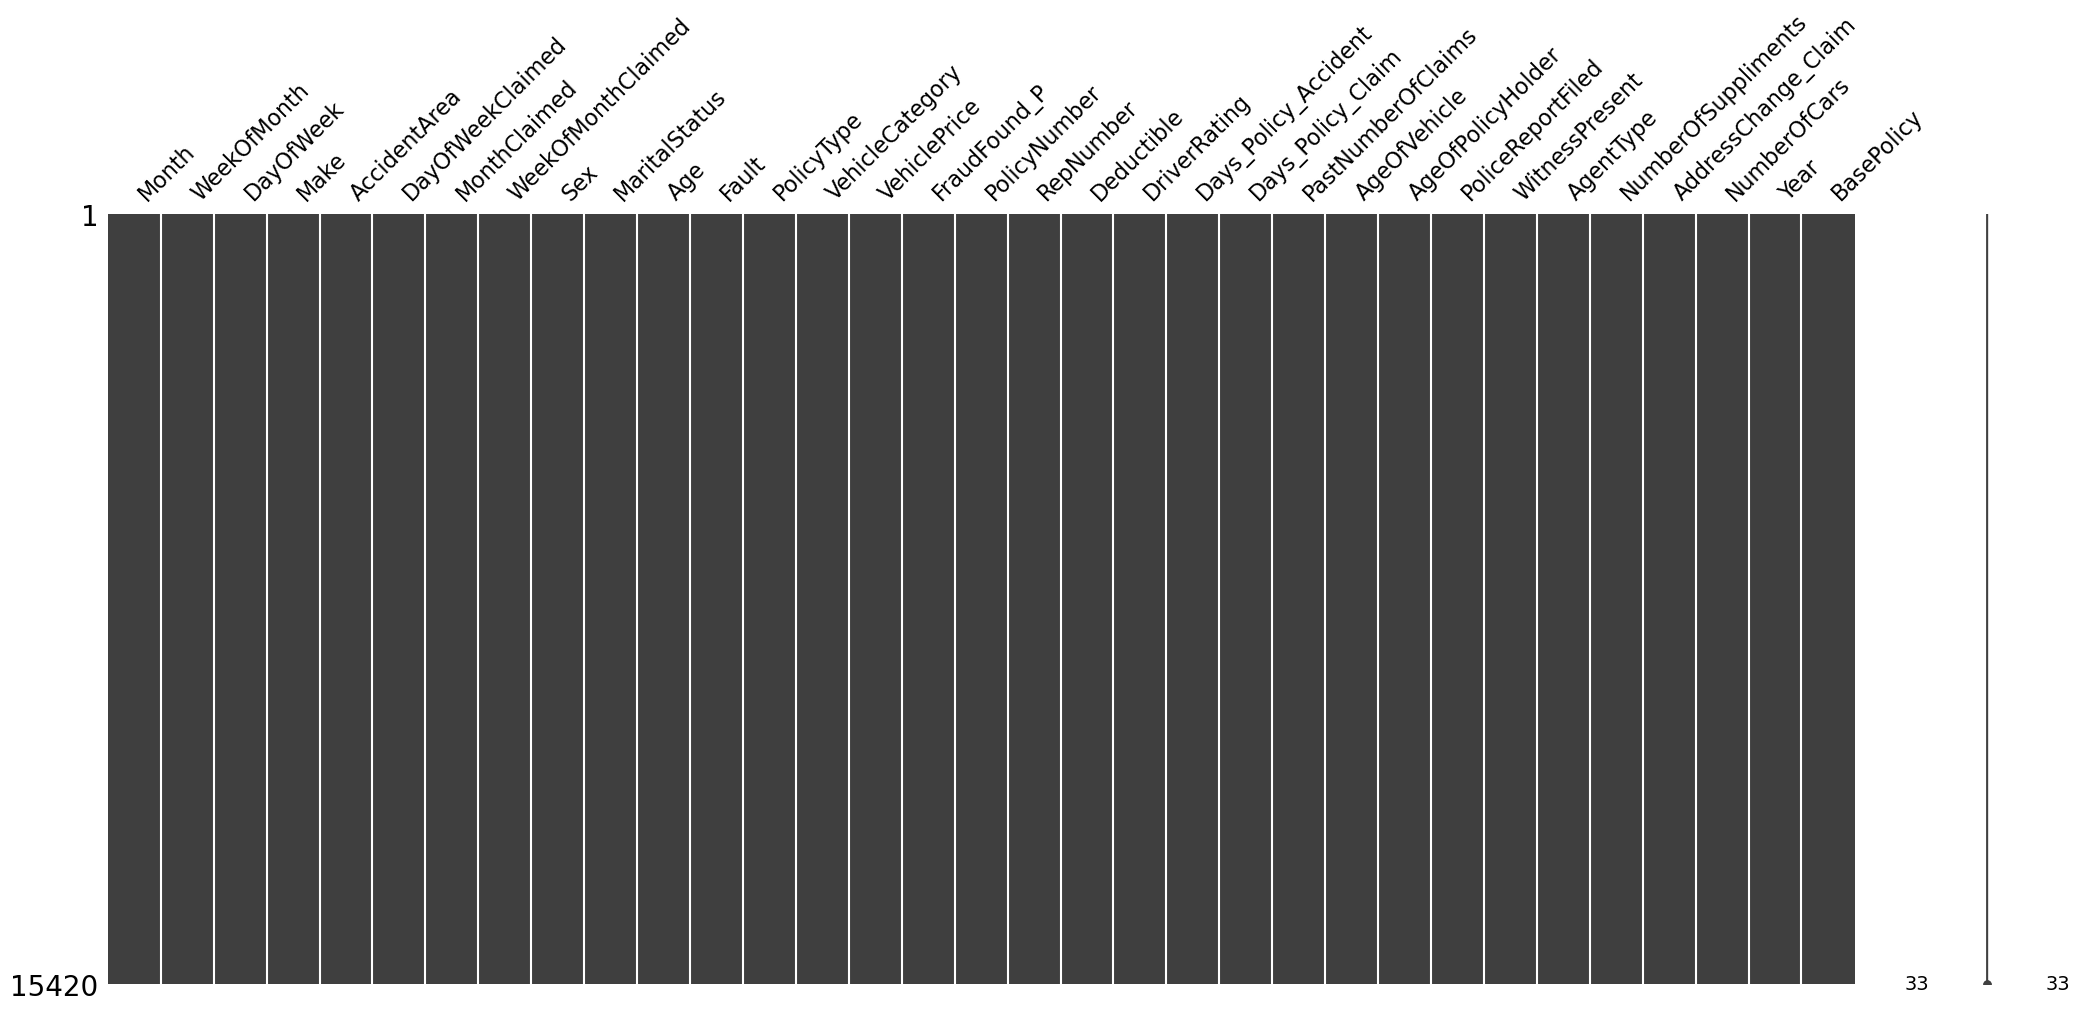

In [23]:
msno.matrix(df)

On ne note aucune valeur manquante dans les 33 variables.

## Résumés des données 

In [28]:
# Fonction pour obtenir les statistiques descriptives des variables des données
def summarize_df(Dataframe):

    summary = pd.DataFrame()

    # Type de données 
    summary["Data Type"] = Dataframe.dtypes

    # Nombre de valeur uniques
    summary["Unique values"] = Dataframe.nunique()

    # Les valeurs uniques 
    summary["Unique"] = Dataframe.apply(lambda x: x.unique().tolist())

    # Maximum
    summary["Max"] = Dataframe.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else "-")

    # Minimum 
    summary["Min"] = Dataframe.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else "-")

    # Moyenne, Médiane, Mode
    summary["Mean"] = Dataframe.apply(lambda x: round(x.mean(), 4) if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Median"] = Dataframe.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Mode"] = Dataframe.apply(lambda x: x.mode().iloc[0] if pd.api.types.is_numeric_dtype(x) else "-")

    # Mesures de dispersion
    summary["Range"] = Dataframe.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Variance"] = Dataframe.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Range"] = Dataframe.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else "-")

    # Mesures de la forme de la distribution 
    summary["Skewness"] = Dataframe.apply(lambda x: round(x.skew(), 4) if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Kurtosis"] = Dataframe.apply(lambda x: round(x.kurt(), 4) if pd.api.types.is_numeric_dtype(x) else "-")

    return summary

In [29]:
summary = summarize_df(df)
summary

,Data Type,Unique values,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.7886,3.0,3,1.287585,1.657876,0.1154,-1.1012
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.694,3.0,2,1.259115,1.585371,0.1582,-1.0856
Sex,object,2,"[Female, Male]",-,-,-,-,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,-,-,-,-,-


- Les variables "MonthClaimed" et "DayOfWeekClaimed" qui devraient compter respectivement 12 et 7 modalités comptent 13 et 8 modalités due à la présence de 0 dans les observations
- Les variables comprenant 2 modalités peuvent être recoder en variables binaires : "Sex", "PoliceReportFiled", "WitnessPresent", "AccidentalArea", "Fault", "AgentType"
- On note un age minimum de 0 qu'il faudra traiter
- On peut supprimer "PolicyNumber" étant donné qu'elle ne fournit pas d'information sur un potentiel de fraude

## Analyse exploratoire des données 

In [34]:
df_1 = df.copy()

### Variable dépendante - Fraud_Found_P 

In [37]:
# Comptage du nombre de cas de fraude
fraud_counts = df_1["FraudFound_P"].value_counts().reset_index()
fraud_counts.columns = ["FraudFound_P", "Count"]
fraud_counts

,FraudFound_P,Count
0,0,14497
1,1,923


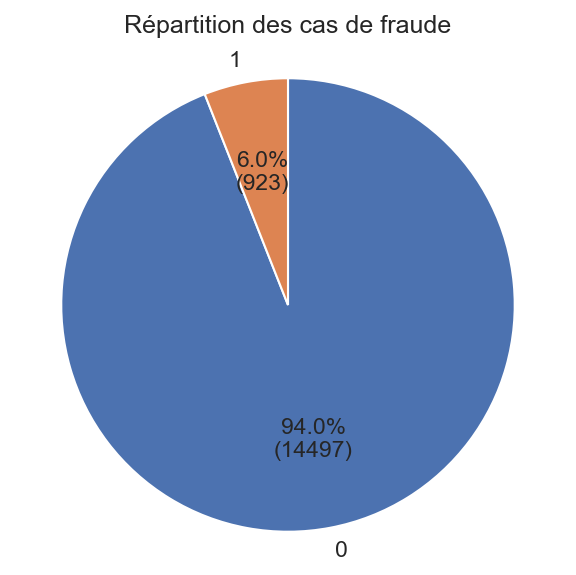

In [48]:
sns.set_theme(style="whitegrid")  

labels = fraud_counts["FraudFound_P"].astype(str)
sizes  = fraud_counts["Count"].to_numpy()

# Fonction d'affichage
def autopct_format(values):
    total = values.sum()
    def _fmt(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return _fmt

# Graphique
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
ax.pie(
    sizes,
    labels=labels,
    autopct=autopct_format(sizes),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(linewidth=1, edgecolor="white"),
    textprops=dict(fontsize=11),
)
ax.axis("equal")  # cercle parfait
ax.set_title("Répartition des cas de fraude", pad=12)
plt.tight_layout()
plt.show()

On note qu'il y a très peu de cas de fraudes dans nos données. Cela pourrait induire un biais dans le modèle pour la classe majoritaire et donc une faible performance pour la classe minoritaire. Les métriques comme la précision pourrait ne pas être vraiment utiles car une haute précision pourrait être due à une bonne prédiction de la classe majoritaire. 




### Fraude et Sexe 

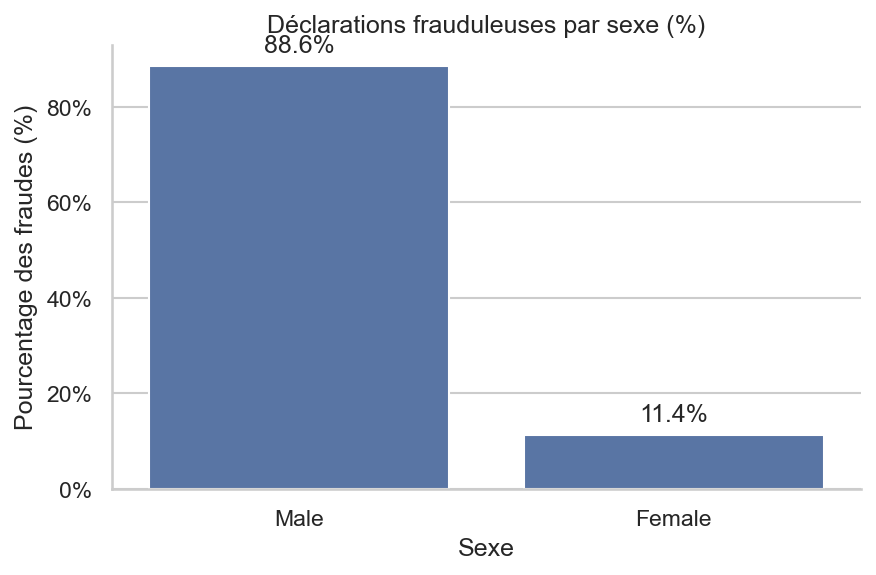

In [47]:
# Déclarations frauduleuses
df_fraud = df_1[df_1["FraudFound_P"] == 1]

# Distribution par sexe
fraud_counts_sex = df_fraud["Sex"].value_counts()
fraud_percentages_sex = (fraud_counts_sex / fraud_counts_sex.sum()) * 100
fraud_percentages_sex

# Transformation de la série en dataframe
plot_df = fraud_percentages_sex.rename_axis("Sex").reset_index(name="Percent")


# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Sex", y="Percent")

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Sexe")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par sexe (%)")

# Annotations sur chaque barre
for p in ax.patches:
    val = p.get_height()
    ax.annotate(f"{val:.1f}%",
               (p.get_x() + p.get_width() / 2, val),
               ha="center", va="bottom",
               xytext=(0,4), textcoords="offset points")

sns.despine()
plt.tight_layout()
plt.show()

L'analyse de ce graphique montre que les hommes sont significativement plus impliqués dans les cas de réclamations frauduleuses que les femmes.

### Fraude et variables d'âge 

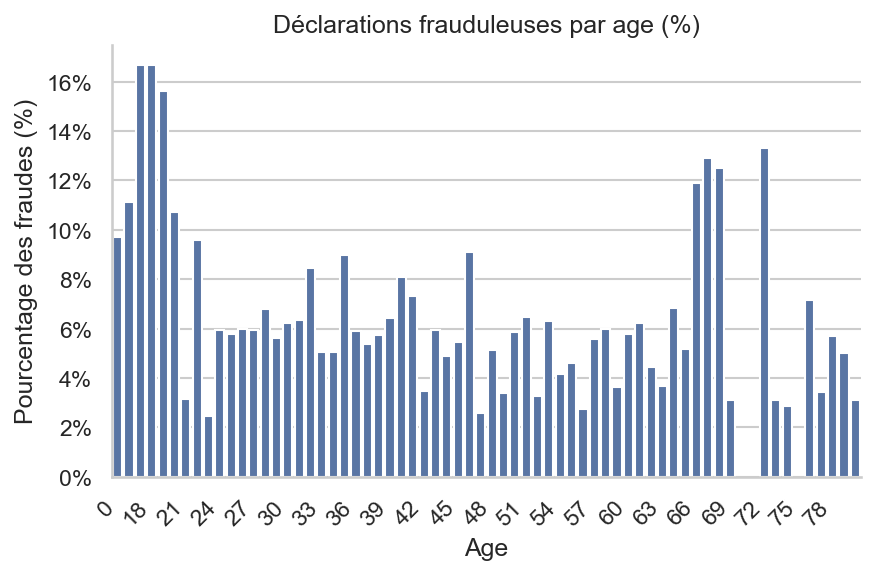

In [60]:
df_fraud = df_1[df_1["FraudFound_P"] == 1]
df_non_fraud = df_1[df_1["FraudFound_P"] == 0]

# Compter le nombre d'observations par âge
df_counts_age = df_1["Age"].value_counts().sort_index()
df_counts_fraud = df_fraud["Age"].value_counts().sort_index()

# Pourcentage de cas frauduleux par âge 
df_percentages_age_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)


# dataframe
plot_df = df_percentages_age_fraud.rename_axis("Age").reset_index(name="Percent")
plot_df

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Age", y="Percent")

step = max(1, len(plot_df) // 20)
ax.set_xticks(range(0, len(plot_df), step))
ax.set_xticklabels(plot_df["Age"].iloc[::step].astype(str), rotation=45, ha="right")

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Age")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par age (%)")

sns.despine()
plt.tight_layout()
plt.show()

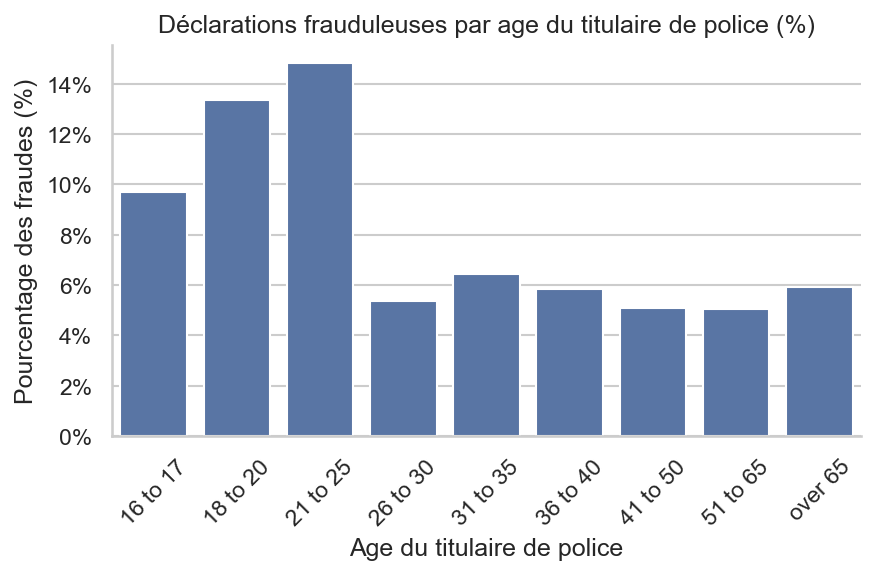

In [65]:
df_fraud = df_1[df_1["FraudFound_P"] == 1]
df_non_fraud = df_1[df_1["FraudFound_P"] == 0]

# Compter le nombre d'observations par âge
df_counts_age = df_1["AgeOfPolicyHolder"].value_counts().sort_index()
df_counts_fraud = df_fraud["AgeOfPolicyHolder"].value_counts().sort_index()

# Pourcentage de cas frauduleux par âge 
df_percentages_age_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)


# dataframe
plot_df = df_percentages_age_fraud.rename_axis("Age du titulaire").reset_index(name="Percent")
plot_df

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Age du titulaire", y="Percent")
ax.tick_params(axis="x", labelrotation=45)


ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Age du titulaire de police")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par age du titulaire de police (%)")

sns.despine()
plt.tight_layout()
plt.show()

Le premier graphique (la répartition par âge exact) montre la même tendance avec plus de bruit par année que le second graphique (par classe d'âge) qui est lisse et rend le signal plus clair. Dans ces données, la proportion de déclarations frauduleuses atteint un maximum chez les jeunes adultes (18 à 25 ans avec des proportions entre 13% et 15%) avec un niveau déjà elevé chez les adolescents, puis décroît nettement pour se stabiliser autour de 5-6% entre 26 et 65 ans. Au delà de 65 ans, on note une légère remontée.

La présence prépondérante de fraudes chez les jeunes pourraient être dû à leurs finances faibles étant donné qu'ils n'ont pas encore commencé à travailler ou à pleinement gagner leurs vies. Chez les vieux de plus de 65 ans, l'entrée à l'âge de la retraite est suivie d'une diminution des sources de revenues. En considérant ces hypothèses, il pourrait y avoir un lien entre la fraude et le revenu.

### Fraude et marque de véhicule

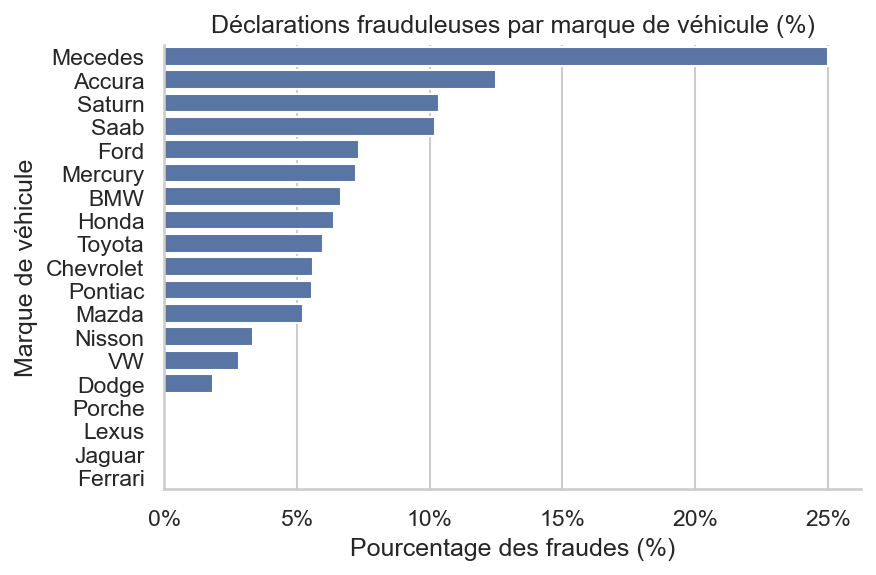

In [70]:
# Préparation des données pour visualisation
df_counts_make = df_1["Make"].value_counts().sort_index()
df_counts_make_fraud = df_fraud["Make"].value_counts().sort_index()
df_pertcentage_make_fraud = pd.DataFrame(round((df_counts_make_fraud / df_counts_make) * 100, 2)).fillna(0).reset_index()

df_pertcentage_make_fraud.columns = ["Make", "Fraud %"]
df_pertcentage_make_fraud = df_pertcentage_make_fraud.sort_values(by=["Fraud %", "Make"], ascending=False)

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=df_pertcentage_make_fraud, x="Fraud %", y="Make")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Marque de véhicule")
ax.set_title("Déclarations frauduleuses par marque de véhicule (%)")

sns.despine()
plt.tight_layout()
plt.show()

Le graphique indique que la proportion de réclamations frauduleuses varie sensiblement selon la marque: **Mercedes** arrive nettement en tête, suivie de **Accura** puis d'un groupe intermétaire composé de **Saturn**, **Saab**, **Ford**, **Mercury** et **BMW**. Les marques les plus courantes comme **Honda**, **Toyota**, **Chevrolet**, **Pontiac**, **Mazda** et **Nisson** ont des proportions plus petite et décroissantes. Les marques plus de luxes comme **Porche**, **Lexus**, **Jaguar** et **Ferrari** affichent des taux nuls.

On pourrait donc penser que pour les marques coûteuses comme **Mercedes** mais quand même assez présente sur le marché, les propriétaires ont plus tendance à frauder. Pour les véhicules dits "de tous les jours" les déclarations frauduleuses sont quand même constantes entre 5-7%. Par contre pour des marques plus luxueuses, on a pratiquement pas de fraudes ce qui peut être traduit par une faible utilisation de ces véhicules (moins exposés au risques d'accient), au coût potentiel de réparation (la valeur marchande étant très haute, on s'attend à avoir une prime élevée et un traitement plus rigoureux des réclamations, de quoi décourager les potentiels fraudeurs). 